In [1]:
import os
import shutil

# Set the path to your folder
folder_path = '/home/gaurav/Downloads/up-s31/s31'

# Create directories to store the extracted images
output_image_path = '/home/gaurav/Downloads/up-s31'
output_ann_path = '/home/gaurav/Downloads/up-s31'

os.makedirs(output_image_path, exist_ok=True)
os.makedirs(output_ann_path, exist_ok=True)

# Loop through the files in the input folder
for filename in os.listdir(folder_path):
    # Check if the file is an image.png
    if filename.endswith("_image.png"):
        file_number = filename.split('_')[0]
        # Check if the corresponding ann.png file exists
        ann_filename = f"{file_number}_ann.png"
        if os.path.exists(os.path.join(folder_path, ann_filename)):
            # Copy image.png to the output image folder
            shutil.copy(os.path.join(folder_path, filename), os.path.join(output_image_path, filename))
            
            # Copy ann.png to the output ann folder
            shutil.copy(os.path.join(folder_path, ann_filename), os.path.join(output_ann_path, ann_filename))

            # Increment the counter and check if we have reached 1000 images
            if int(file_number) >= 999:
                break

print("Extraction completed.")


Extraction completed.


In [1]:
import os
import shutil

# Set the path to your folder
folder_path = '/home/gaurav/Downloads/up-s31/s31'

# Create directories to store the extracted images
output_image_path = '/home/gaurav/Downloads/up-s31/images'
output_ann_path = '/home/gaurav/Downloads/up-s31/masks'

os.makedirs(output_image_path, exist_ok=True)
os.makedirs(output_ann_path, exist_ok=True)

# Loop through the files in the input folder
for i in range(1000):
    # Format the file number with leading zeros
    file_number = f"{i:05d}"
    
    # Check if the image and ann files exist
    image_filename = f"{file_number}_image.png"
    ann_filename = f"{file_number}_ann.png"
    
    if os.path.exists(os.path.join(folder_path, image_filename)) and os.path.exists(os.path.join(folder_path, ann_filename)):
        # Copy image.png to the output image folder
        shutil.copy(os.path.join(folder_path, image_filename), os.path.join(output_image_path, image_filename))
        
        # Copy ann.png to the output ann folder
        shutil.copy(os.path.join(folder_path, ann_filename), os.path.join(output_ann_path, ann_filename))

print("Extraction completed.")


Extraction completed.


In [2]:
import os
from pathlib import Path

# Define the paths to the image and mask folders
image_folder_path = "/home/gaurav/123ofAI/Segmentation/UP-3D/images"
mask_folder_path = "/home/gaurav/123ofAI/Segmentation/UP-3D/masks"

# Sort the files in the image folder
image_files = sorted(Path(image_folder_path).glob('*'))
for i, file in enumerate(image_files):
    new_name = f"{i + 1}.png"  # You can adjust the file extension if needed
    new_path = Path(image_folder_path) / new_name
    file.rename(new_path)

# Sort the files in the mask folder
mask_files = sorted(Path(mask_folder_path).glob('*'))
for i, file in enumerate(mask_files):
    new_name = f"{i + 1}_mask.png"  # You can adjust the file extension if needed
    new_path = Path(mask_folder_path) / new_name
    file.rename(new_path)


# Sobel edge detector

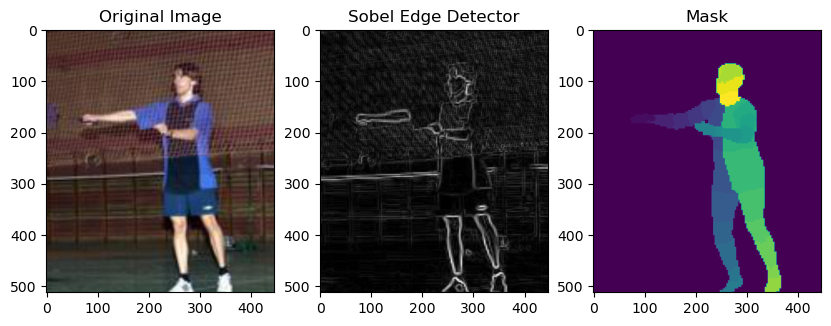

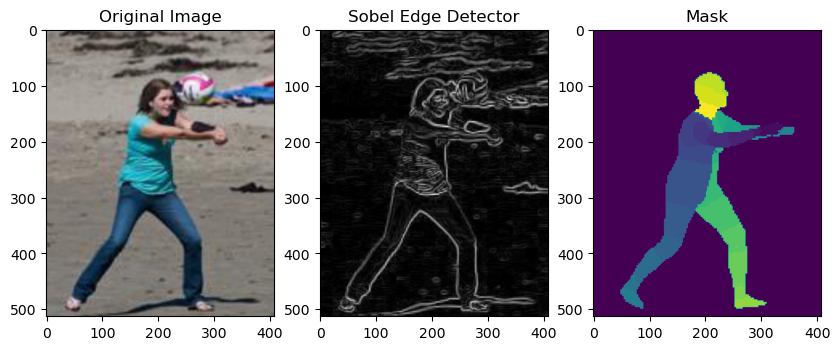

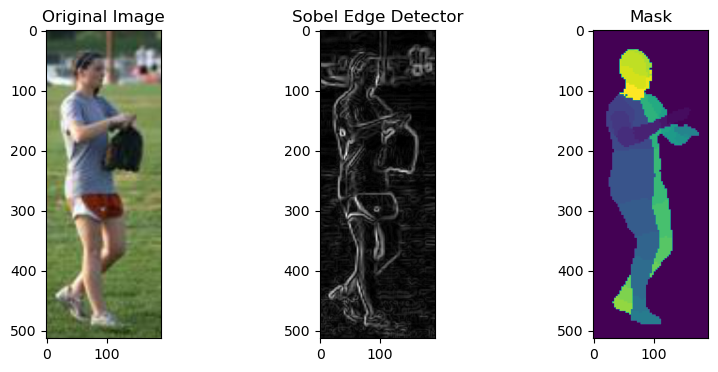

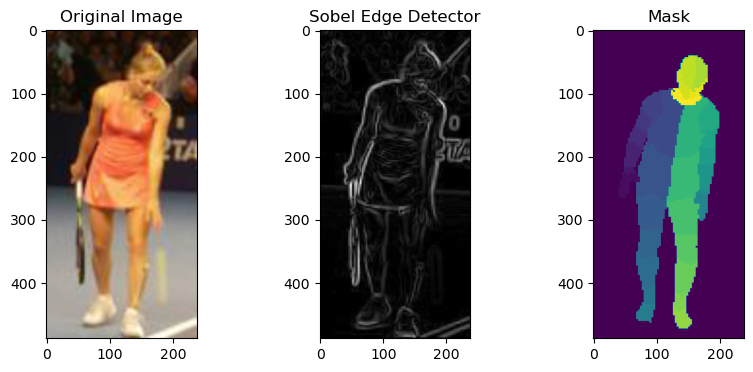

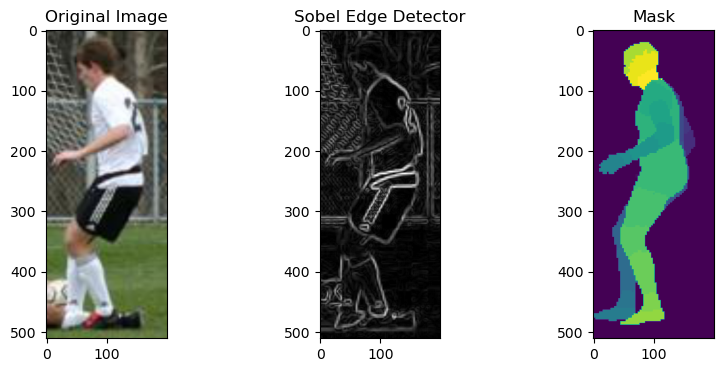

In [15]:
import os
import random
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Set the paths to your images and masks folders
images_folder = "/home/gaurav/123ofAI/Segmentation/UP-3D/images"
masks_folder =  "/home/gaurav/123ofAI/Segmentation/UP-3D/masks"
# Function to apply Sobel edge detector on an image
def apply_sobel(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)
    
    # Apply Sobel edge detector
    sobel_edge = filters.sobel(gray_image)
    
    # Convert back to uint8 for display
    sobel_edge = (sobel_edge * 255).astype('uint8')
    
    return sobel_edge

# Get a list of image filenames
image_filenames = os.listdir(images_folder)
random.shuffle(image_filenames)
selected_images = image_filenames[:5]

# Visualize the original images, Sobel edge detector results, and masks
for image_filename in selected_images:
    # Load the original image
    image_path = os.path.join(images_folder, image_filename)
    original_image = io.imread(image_path)
    
    # Load the corresponding mask
    mask_filename = image_filename.replace(".png", "_mask.png")
    mask_path = os.path.join(masks_folder, mask_filename)
    mask = io.imread(mask_path)
    
    # Apply Sobel edge detector on the original image
    sobel_edge = apply_sobel(original_image)
    
    # Plot the images side by side
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    
    plt.subplot(1, 3, 2)
    plt.imshow(sobel_edge, cmap='gray')
    plt.title('Sobel Edge Detector')
    
    plt.subplot(1, 3, 3)
    plt.imshow(mask)
    plt.title('Mask')
    
    plt.show()


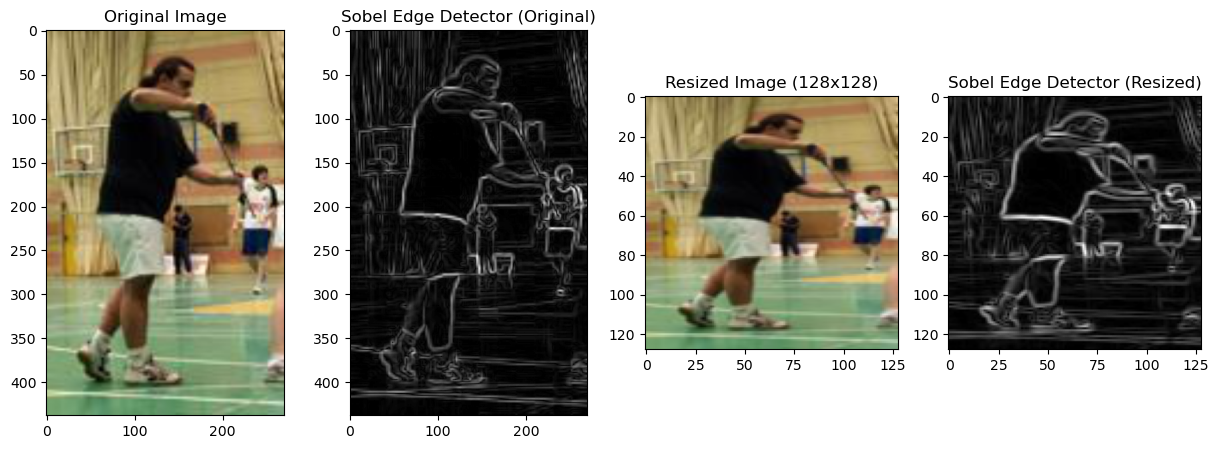

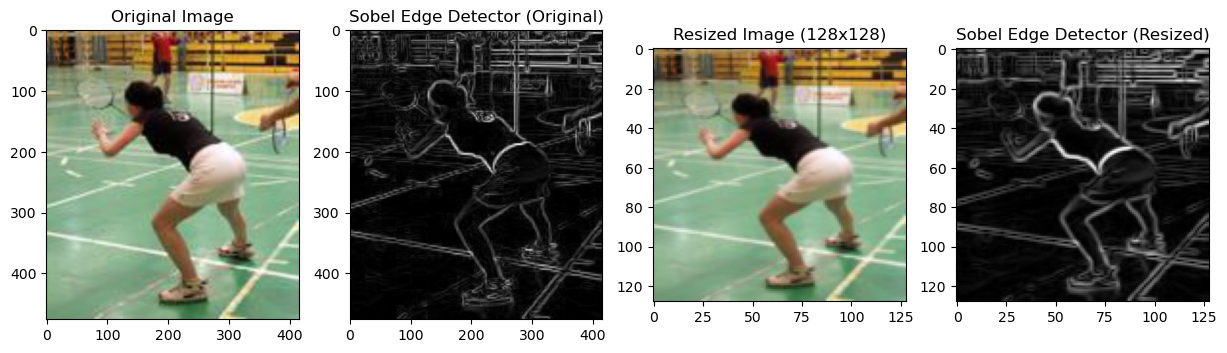

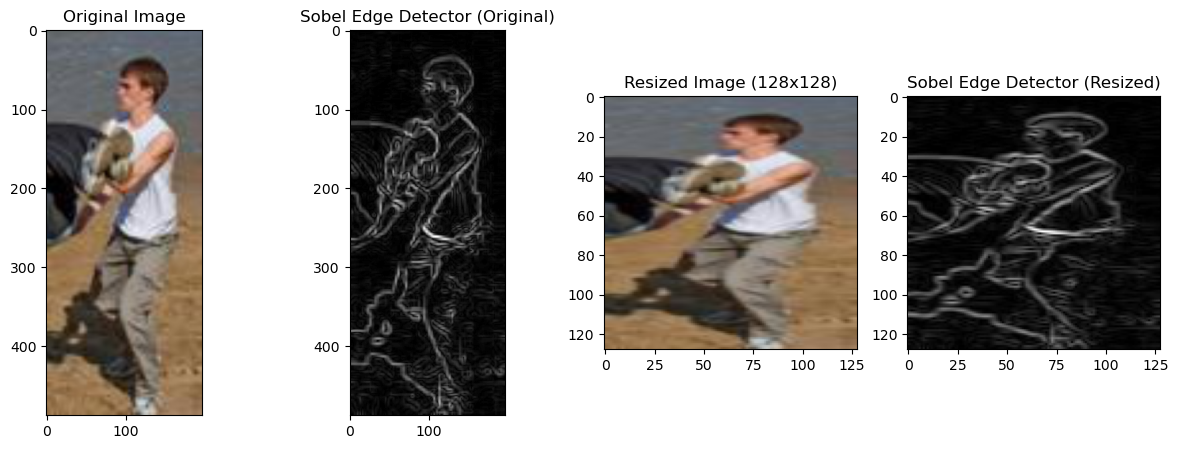

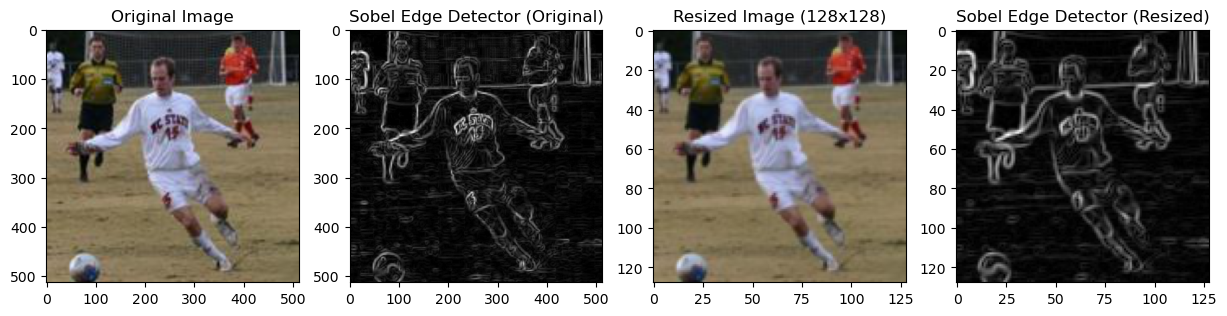

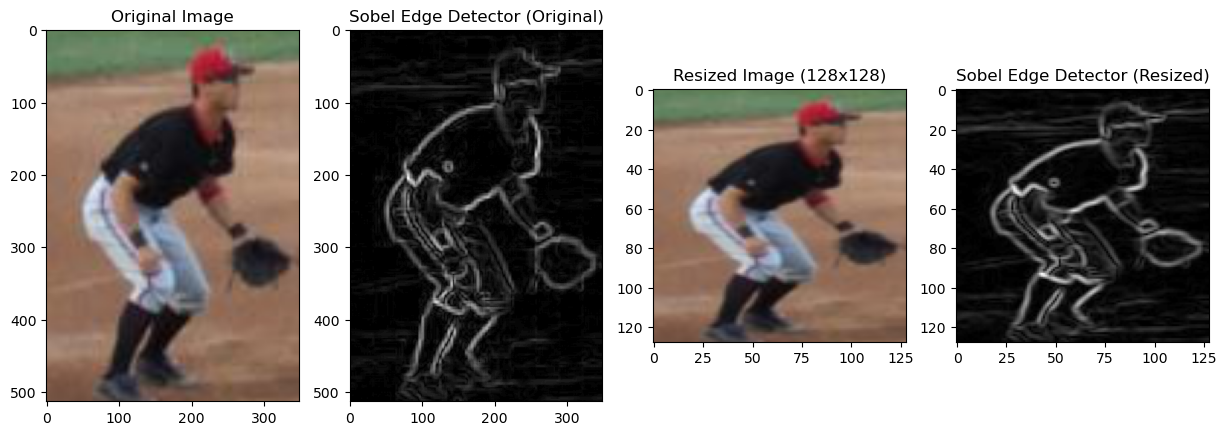

In [24]:
import os
import random
import matplotlib.pyplot as plt
from skimage import io, color, filters, transform

# Set the paths to your images and masks folders
images_folder = "/home/gaurav/123ofAI/Segmentation/UP-3D/images"
masks_folder = "/home/gaurav/123ofAI/Segmentation/UP-3D/masks"

# Function to apply Sobel edge detector on an image
def apply_sobel(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Apply Sobel edge detector
    sobel_edge = filters.sobel(gray_image)

    # Convert back to uint8 for display
    sobel_edge = (sobel_edge * 255).astype('uint8')

    return sobel_edge

# Function to resize an image and mask
def resize_image_and_mask(image, mask, target_size=(128, 128)):
    # Resize the image and mask
    resized_image = transform.resize(image, target_size, mode='reflect', anti_aliasing=True)
    resized_mask = transform.resize(mask, target_size, mode='reflect', anti_aliasing=True)

    return resized_image, resized_mask

# Get a list of image filenames
image_filenames = os.listdir(images_folder)
random.shuffle(image_filenames)
selected_images = image_filenames[:5]

# Visualize the original images, Sobel edge detector results, and masks
for image_filename in selected_images:
    # Load the original image
    image_path = os.path.join(images_folder, image_filename)
    original_image = io.imread(image_path)

    # Load the corresponding mask
    mask_filename = image_filename.replace(".png", "_mask.png")
    mask_path = os.path.join(masks_folder, mask_filename)
    mask = io.imread(mask_path)

    # Apply Sobel edge detector on the original image
    sobel_edge_original = apply_sobel(original_image)

    # Resize the image and mask
    resized_image, resized_mask = resize_image_and_mask(original_image, mask)

    # Apply Sobel edge detector on the resized image
    sobel_edge_resized = apply_sobel(resized_image)

    # Plot the images side by side
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(original_image)
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(sobel_edge_original, cmap='gray')
    plt.title('Sobel Edge Detector (Original)')

    plt.subplot(1, 4, 3)
    plt.imshow(resized_image)
    plt.title('Resized Image (128x128)')

    plt.subplot(1, 4, 4)
    plt.imshow(sobel_edge_resized, cmap='gray')
    plt.title('Sobel Edge Detector (Resized)')

    plt.show()


## Otsu Threshold 

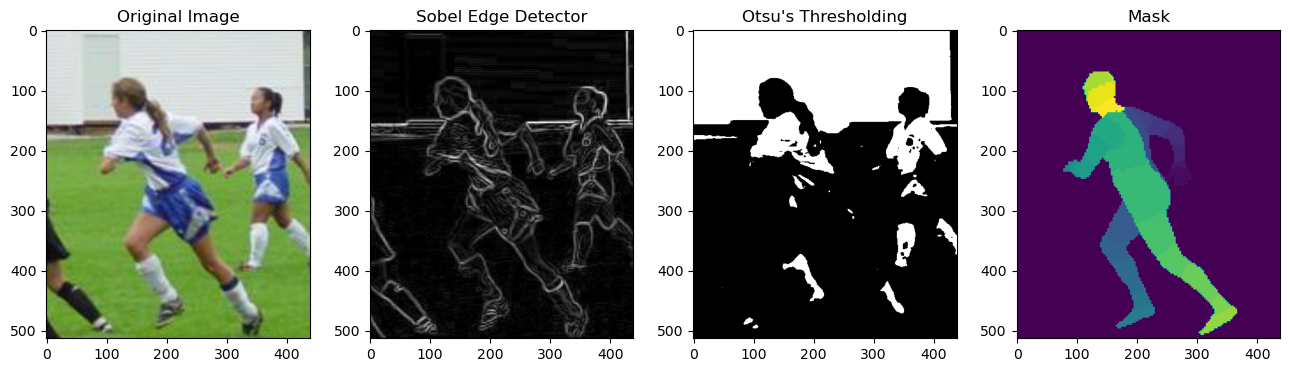

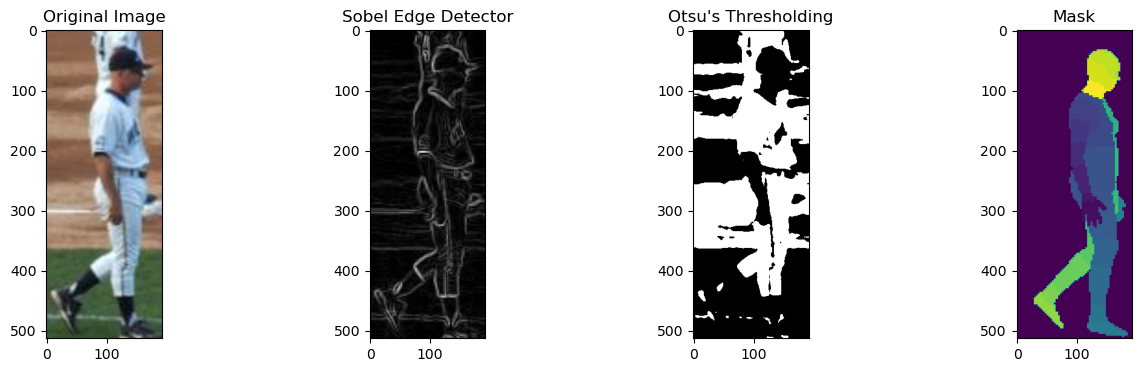

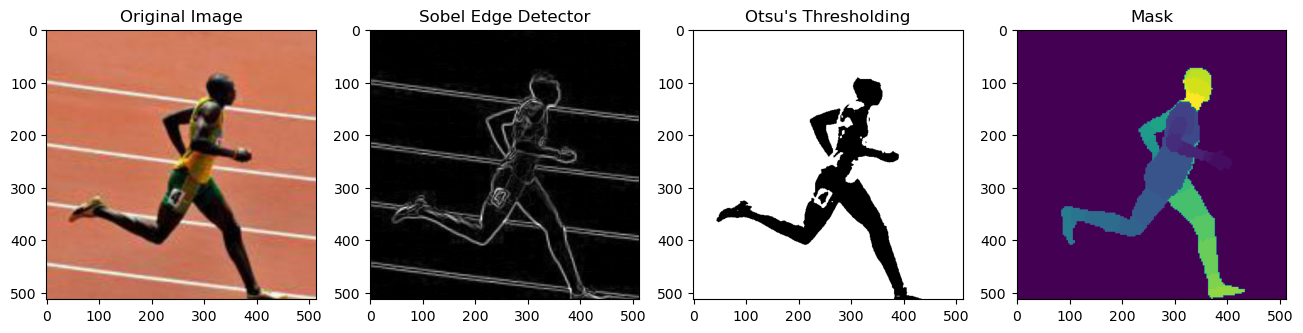

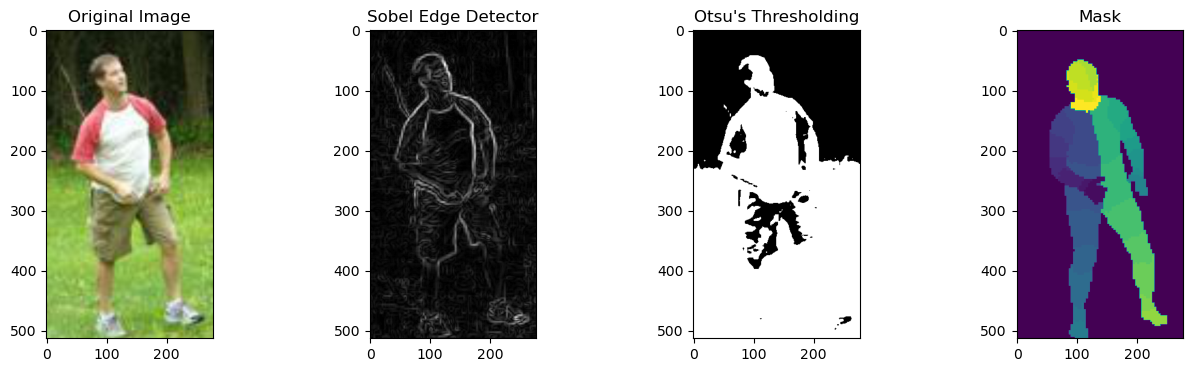

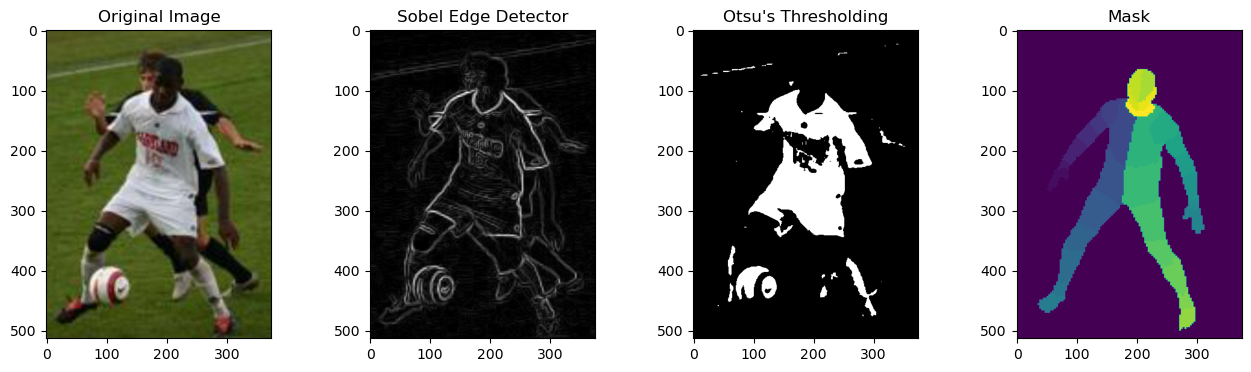

In [10]:
import os
import random
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology

# Set the paths to your images and masks folders
images_folder = "/home/gaurav/123ofAI/Segmentation/UP-3D/images"
masks_folder =  "/home/gaurav/123ofAI/Segmentation/UP-3D/masks"

# Function to apply Sobel edge detector on an image
def apply_sobel(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)
    
    # Apply Sobel edge detector
    sobel_edge = filters.sobel(gray_image)
    
    # Convert back to uint8 for display
    sobel_edge = (sobel_edge * 255).astype('uint8')
    
    return sobel_edge

# Function to apply Otsu's thresholding on an image
def apply_otsu_threshold(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)
    
    # Apply Otsu's thresholding
    threshold_value = filters.threshold_otsu(gray_image)
    binary_image = gray_image > threshold_value
    
    # Convert back to uint8 for display
    binary_image = (binary_image * 255).astype('uint8')
    
    return binary_image

# Get a list of image filenames
image_filenames = os.listdir(images_folder)
random.shuffle(image_filenames)
selected_images = image_filenames[:5]

# Visualize the original images, Sobel edge detector results, Otsu's threshold results, and masks
for image_filename in selected_images:
    # Load the original image
    image_path = os.path.join(images_folder, image_filename)
    original_image = io.imread(image_path)
    
    # Load the corresponding mask
    mask_filename = image_filename.replace(".png", "_mask.png")
    mask_path = os.path.join(masks_folder, mask_filename)
    mask = io.imread(mask_path)
    
    # Apply Sobel edge detector on the original image
    sobel_edge = apply_sobel(original_image)
    
    # Apply Otsu's thresholding on the original image
    otsu_threshold = apply_otsu_threshold(original_image)
    
    # Plot the images side by side
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 4, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    
    plt.subplot(1, 4, 2)
    plt.imshow(sobel_edge, cmap='gray')
    plt.title('Sobel Edge Detector')
    
    plt.subplot(1, 4, 3)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title("Otsu's Thresholding")
    
    plt.subplot(1, 4, 4)
    plt.imshow(mask)
    plt.title('Mask')
    
    plt.show()


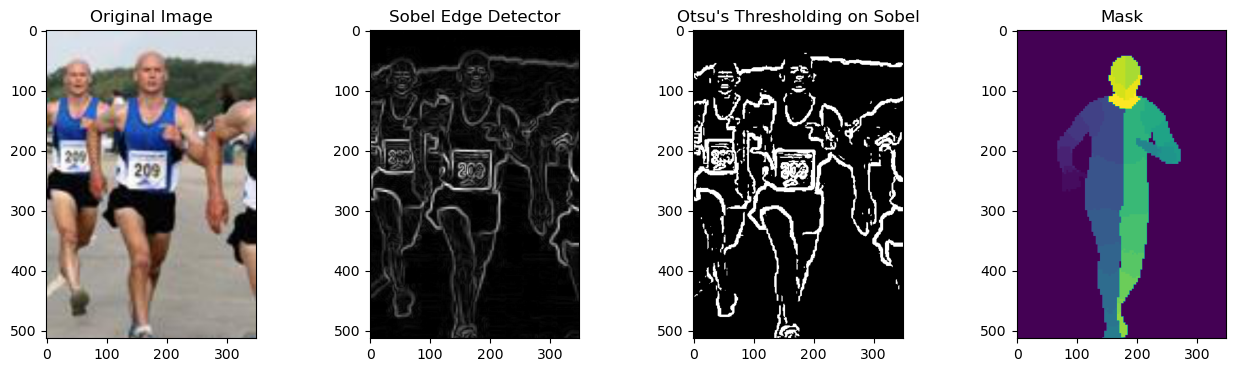

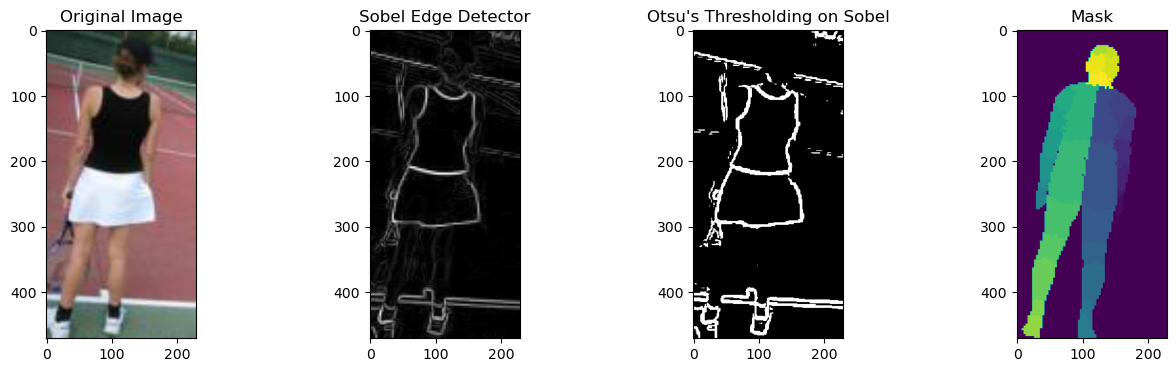

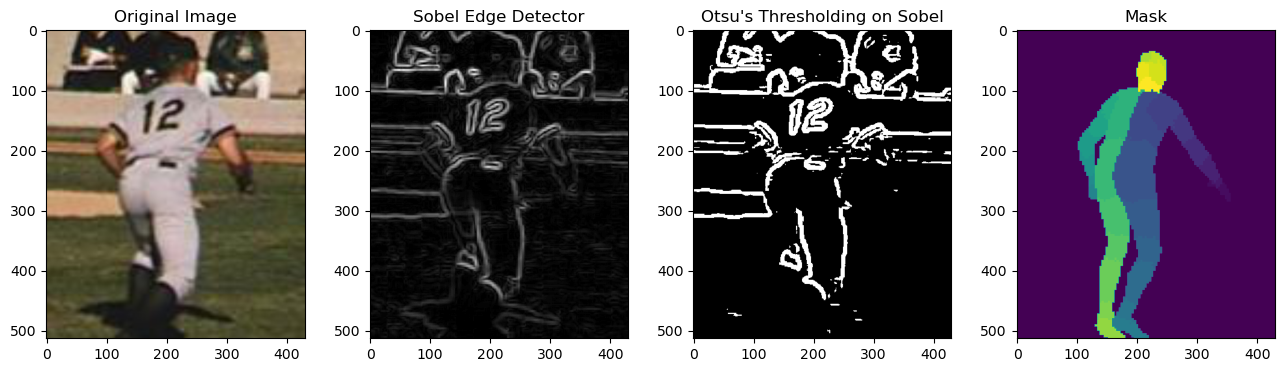

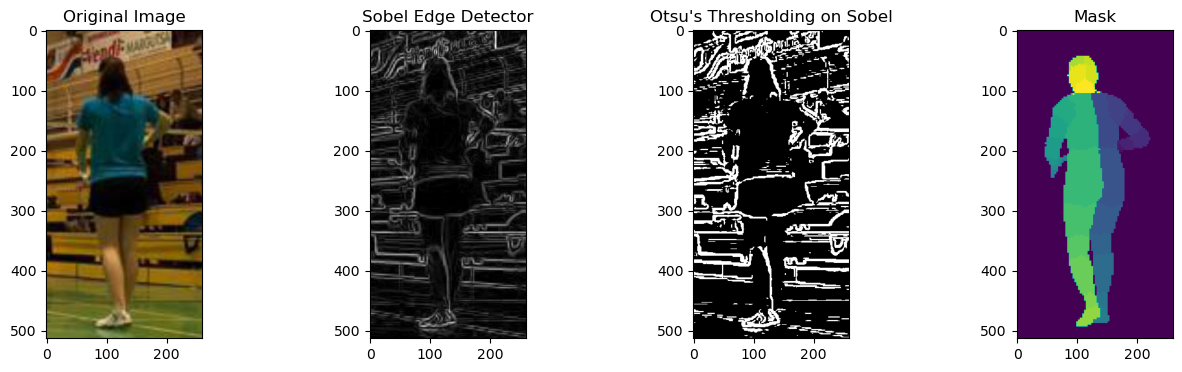

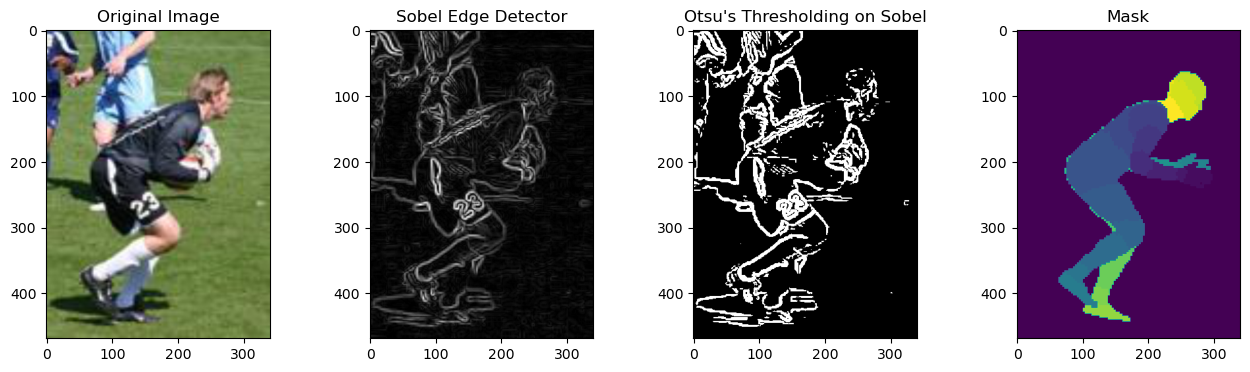

In [17]:
import os
import random
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology

# Set the paths to your images and masks folders
images_folder = "/home/gaurav/123ofAI/Segmentation/UP-3D/images"
masks_folder =  "/home/gaurav/123ofAI/Segmentation/UP-3D/masks"

# Function to apply Sobel edge detector on an image
def apply_sobel(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)
    
    # Apply Sobel edge detector
    sobel_edge = filters.sobel(gray_image)
    
    # Convert back to uint8 for display
    sobel_edge = (sobel_edge * 255).astype('uint8')
    
    return sobel_edge

# Function to apply Otsu's thresholding on an image
def apply_otsu_threshold(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)
    
    # Apply Sobel edge detector
    sobel_edge = filters.sobel(gray_image)
    
    # Apply Otsu's thresholding on the Sobel edge
    threshold_value = filters.threshold_otsu(sobel_edge)
    binary_image = sobel_edge > threshold_value
    
    # Convert back to uint8 for display
    binary_image = (binary_image * 255).astype('uint8')
    
    return binary_image

# Get a list of image filenames
image_filenames = os.listdir(images_folder)
random.shuffle(image_filenames)
selected_images = image_filenames[:5]

# Visualize the original images, Sobel edge detector results, Otsu's threshold results, and masks
for image_filename in selected_images:
    # Load the original image
    image_path = os.path.join(images_folder, image_filename)
    original_image = io.imread(image_path)
    
    # Load the corresponding mask
    mask_filename = image_filename.replace(".png", "_mask.png")
    mask_path = os.path.join(masks_folder, mask_filename)
    mask = io.imread(mask_path)
    
    # Apply Sobel edge detector on the original image
    sobel_edge = apply_sobel(original_image)
    
    # Apply Otsu's thresholding on the Sobel edge
    otsu_threshold = apply_otsu_threshold(original_image)
    
    # Plot the images side by side
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 4, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    
    plt.subplot(1, 4, 2)
    plt.imshow(sobel_edge, cmap='gray')
    plt.title('Sobel Edge Detector')
    
    plt.subplot(1, 4, 3)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title("Otsu's Thresholding on Sobel")
    
    plt.subplot(1, 4, 4)
    plt.imshow(mask)
    plt.title('Mask')
    
    plt.show()
